In [3]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
tips.to_csv("tips.csv", index=False)

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Визуализация распределения

[Seaborn](https://seaborn.pydata.org/) — это более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Для визуализации распределения метрических переменных используются следующие типы графиков:

* distplot
* jointplot
* rugplot
* kdeplot

Можно таже визуализировать относительные распределения между парами переменных при помощи методов:
* PairGrid
* pairplot
* FacetGrid

## distplot

distplot одновременно показывает гистограмму и график плотности распределения.

In [6]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
5      25.29
6       8.77
7      26.88
8      15.04
9      14.78
10     10.27
11     35.26
12     15.42
13     18.43
14     14.83
15     21.58
16     10.33
17     16.29
18     16.97
19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
24     19.82
25     17.81
26     13.37
27     12.69
28     21.70
29     19.65
       ...  
214    28.17
215    12.90
216    28.15
217    11.59
218     7.74
219    30.14
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
227    20.45
228    13.28
229    22.12
230    24.01
231    15.69
232    11.61
233    10.77
234    15.53
235    10.07
236    12.60
237    32.83
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

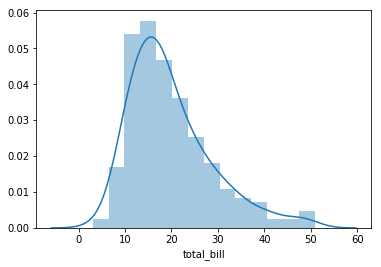

In [32]:
sns.distplot(tips['total_bill'])

Можно оставить только гистограмму:

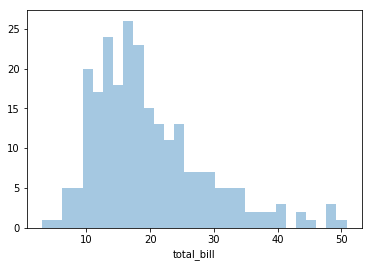

In [33]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

## jointplot

Функция jointplot() показывает совместное распределение по двум переменным. Она имеет параметр **kind** который может принимать следующие значения: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

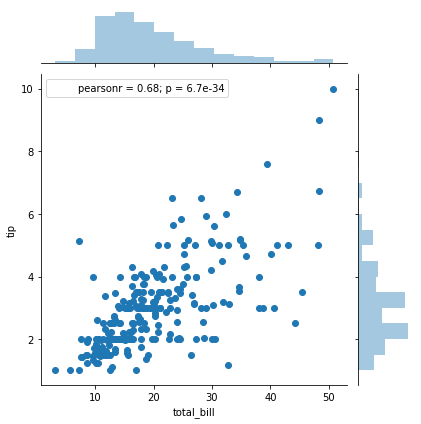

In [34]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

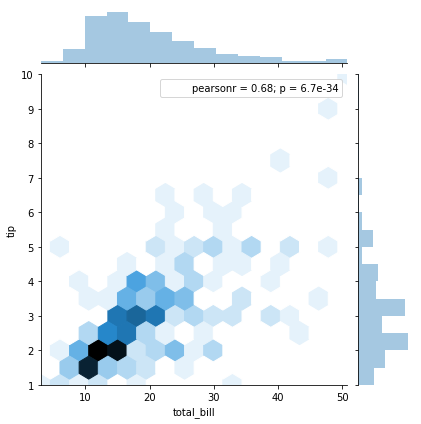

In [35]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

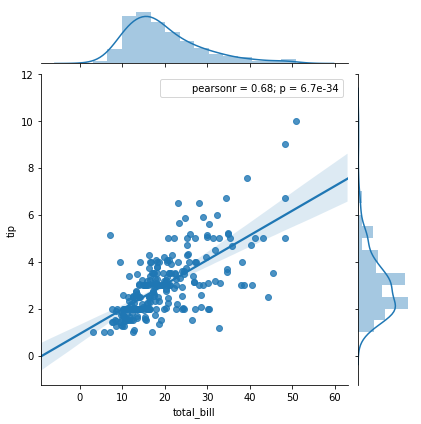

In [38]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

## pairplot

pairplot показывает отношения между всеми парами переменных.

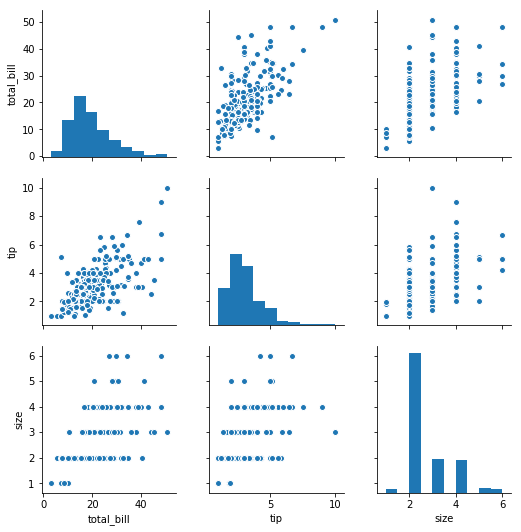

In [39]:
sns.pairplot(tips)

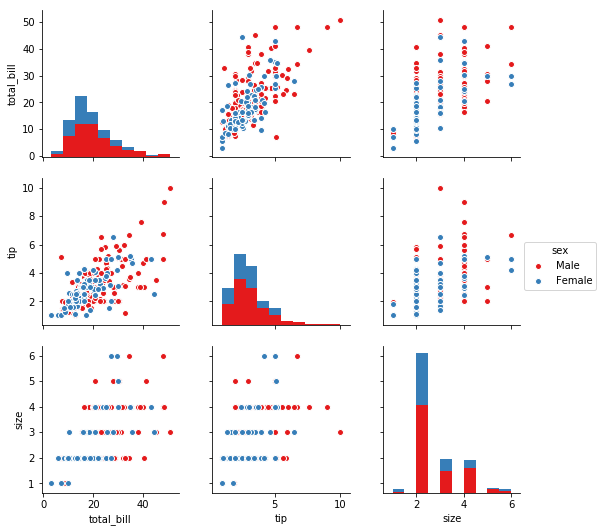

In [41]:
sns.pairplot(tips, hue='sex', palette='Set1')

По сути pairplot — это упрощённая версия другой функции, которая называется PairGrid.

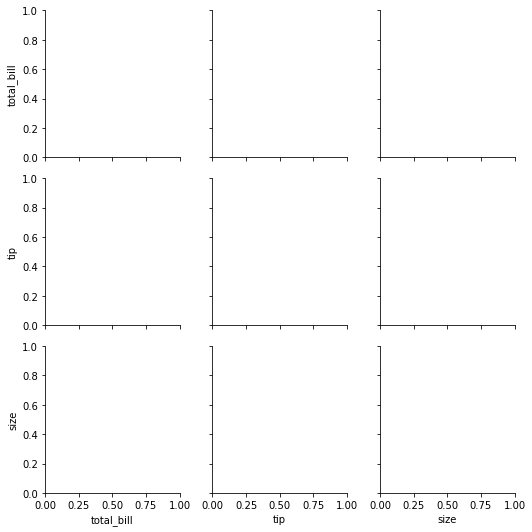

In [44]:
sns.PairGrid(tips)

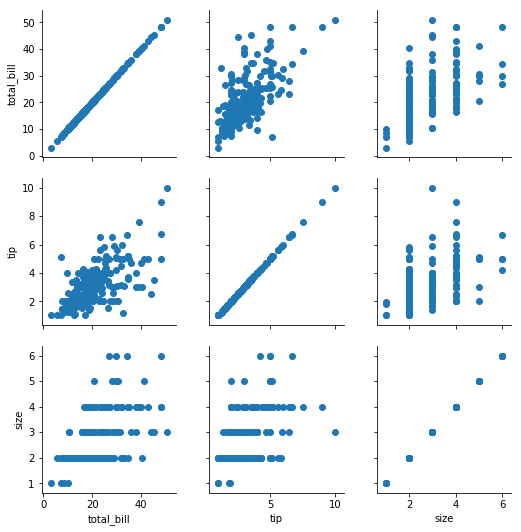

In [48]:
import matplotlib.pyplot as plt

g = sns.PairGrid(tips)
g.map(plt.scatter)

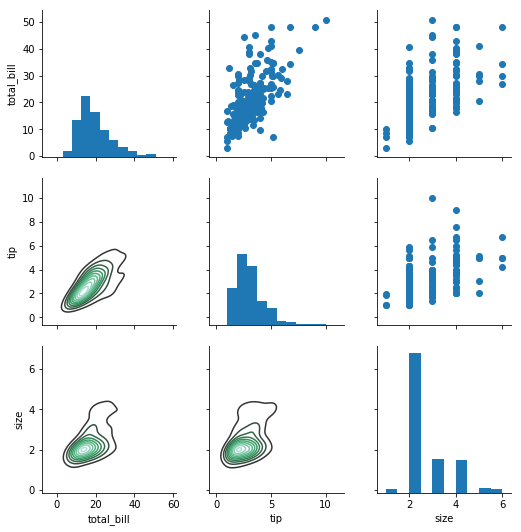

In [50]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

Плотность распределения по двум переменным даёт нам градиент. Градиент — вектор, своим направлением указывающий направление наибольшего возрастания некоторой величины $\varphi$ , значение которой меняется от одной точки пространства к другой (скалярного поля), а по величине (модулю) равный скорости роста этой величины в этом направлении.

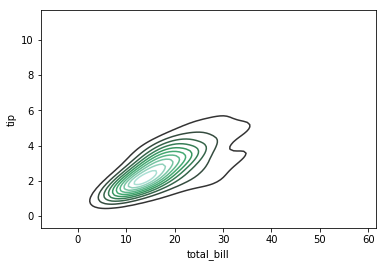

In [51]:
sns.kdeplot(tips['total_bill'], tips['tip'])

## Facet Grid

Facet Grid позволяет визуализировать совместное распределение отдельных признаков нескольких переменных.

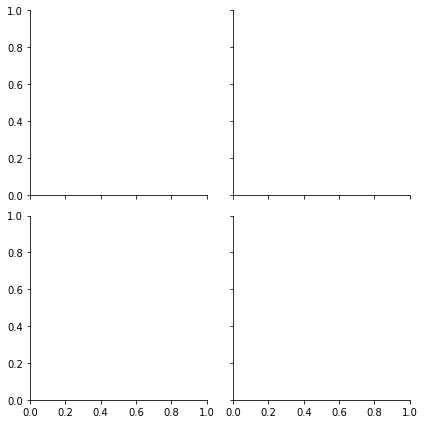

In [52]:
g = sns.FacetGrid(tips, col="time", row="smoker")

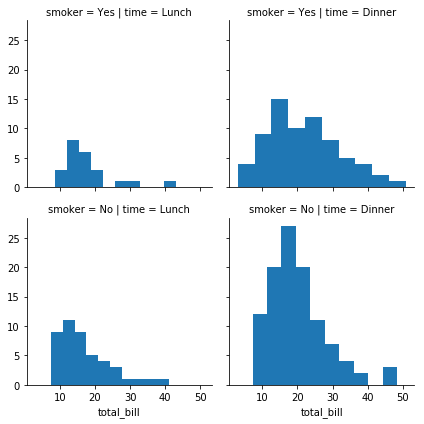

In [53]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill")

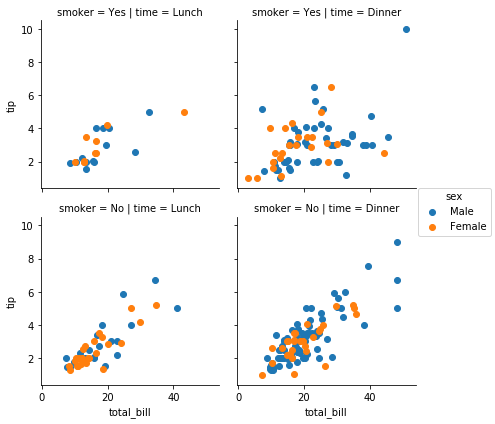

In [54]:
g = sns.FacetGrid(tips, col="time", row="smoker", hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## rugplot

rugplot показывает то же, что и график плотности распределения, только в одномерной форме. Чем плотнее расположены линии, тем выше плотность. Лучше использовать его совместно с другими видами графиков.

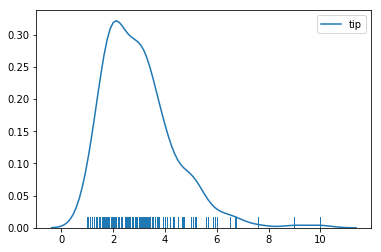

In [43]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Визуализация категориальных данных

В seaborn встроены функции для визуализации категориальных данных в следующих форматах:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

В качестве тестового набора данных возьмём данные о чаевых, которые поставляются вместе с seaborn:

## barplot

Первый тип визуализации — это barplot. У нас есть категориальная переменная и её цифровое значение. Барплот аггрегирует данные по значениям категориальной переменной и применяет определённую функцию к значениям соответсвующих групп цифровой переменной. По умолчанию эта функция — среднее.

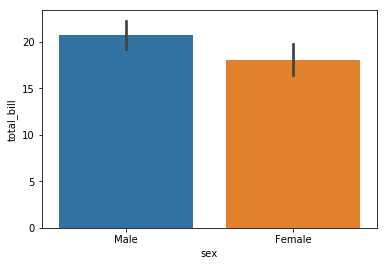

In [3]:
sns.barplot(x='sex', y='total_bill', data=tips)

Эту функцию можно изменить в аргументе `estimator`:

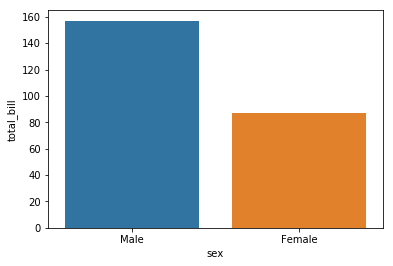

In [7]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=len)
sns.countplot(x='sex', data=tips)

Здесь мы считаем стандартное отклоенение.

## countplot

То же самое, что и барплот, только функция уже явно задана, и она считает количество значений в каждой категории.

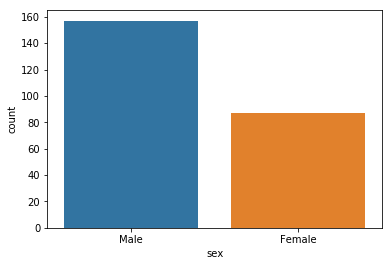

In [7]:
sns.countplot(x='sex', data=tips)

<span style="color:red">**Промежуточное задание 1. Постройте при помощи barplot точно также график, как с помощью countplot.**</span>

## boxplot и violinplot

Эти два графика используются для изучения формы распределения.

### boxplot

Другое название boxplot — ящик с усами или диаграмма размаха. Он был разработан Джоном Тьюки в 1970-х годах.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

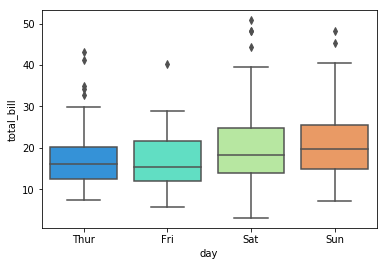

In [9]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')

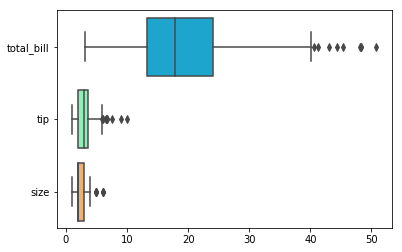

In [10]:
sns.boxplot(data=tips, palette='rainbow', orient='h')

Можно ввести в график третье измерение:

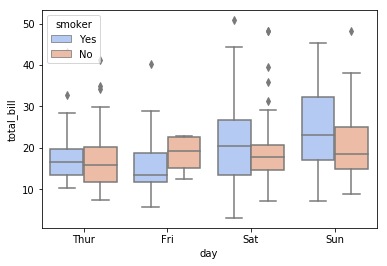

In [15]:
sns.boxplot(
    x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")

### violinplot

Выполняет ту же функцию, что и boxplot. По сути это два повёрнутые на 90 и -90 градусов графика плотности распределения, слипшиеся друг с другом.

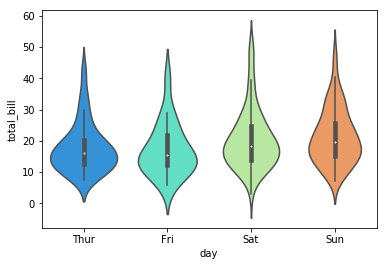

In [16]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')

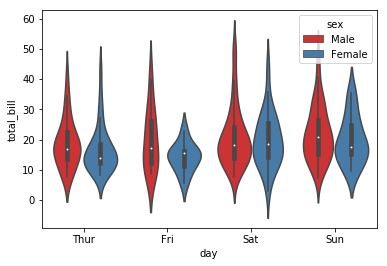

In [17]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')

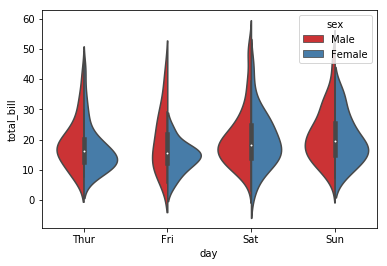

In [18]:
sns.violinplot(
    x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1')

## stripplot и swarmplot

stripplot рисует диаграмму рассеяния, состоящую из одной категориальной переменной. Его можно использовать как самостоятельную фигуру, но лучше сочетать с другими графиками.

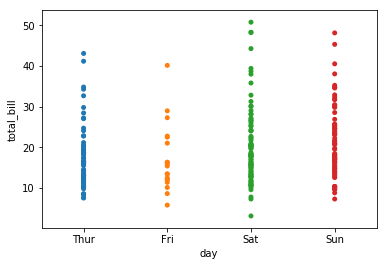

In [19]:
sns.stripplot(x="day", y="total_bill", data=tips)

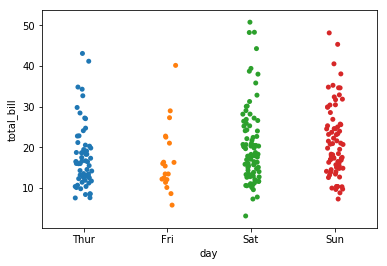

In [20]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

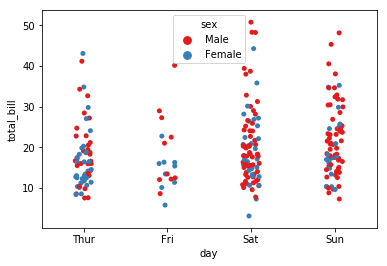

In [21]:
sns.stripplot(
    x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1')

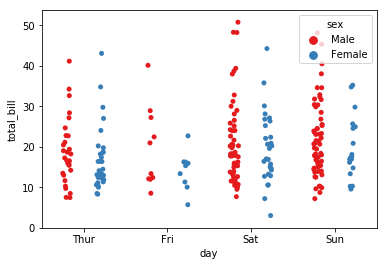

In [24]:
sns.stripplot(
    x="day",
    y="total_bill",
    data=tips,
    jitter=True,
    hue='sex',
    palette='Set1',
    dodge=True)  # раньше назывался split

Swarmplot представляет собой ровно то же самое, с той лишь разницей, что точки не накладываются друг на друга.

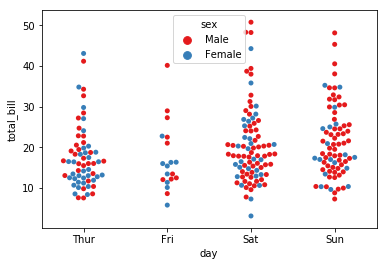

In [8]:
sns.swarmplot(
    x="day", y="total_bill", hue='sex', data=tips, palette="Set1", dodge=True)

Как говорилась ранее, эти типы графиков можно комбинировать с другими. Лучше всего это делать с violinplot.

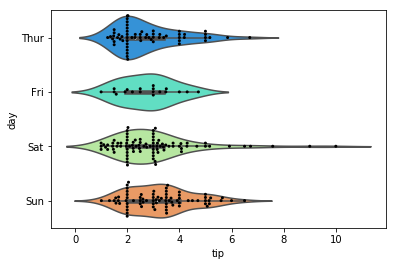

In [28]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips, color='black', size=3)

## factorplot

Из документации: *The default plot that is shown is a point plot, but other seaborn
categorical plots can be chosen with the ``kind`` parameter, including
box plots, violin plots, bar plots, or strip plots.*

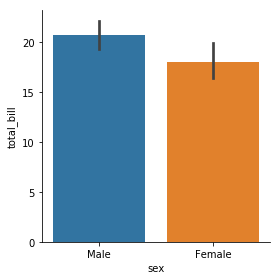

In [29]:
sns.factorplot(x='sex', y='total_bill', data=tips, kind='bar')

# Матричные графики

## Тепловая карта

In [9]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


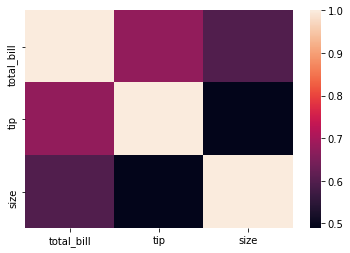

In [56]:
sns.heatmap(tips.corr())

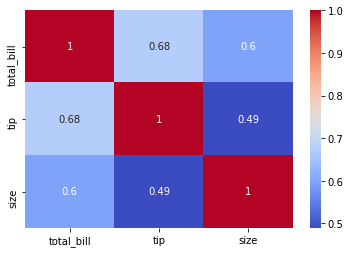

In [57]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Загрузим данные о полётах:

In [59]:
flights = sns.load_dataset('flights')

In [61]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Посчитаем таблицу сопряжённости, которая покажет, какое количество пассажиров летало в различные месяцы в каждый из годов в промежутке от 1949 по 1960.

In [63]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


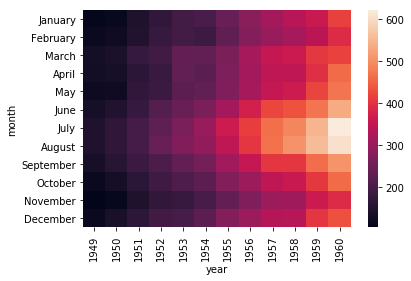

In [64]:
pvflights = flights.pivot_table(
    values='passengers', index='month', columns='year')
sns.heatmap(pvflights)

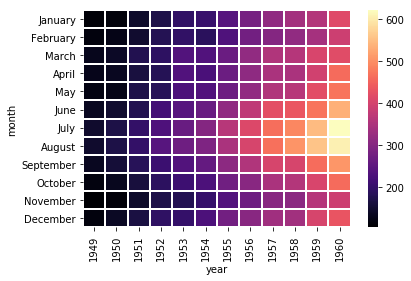

In [65]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

Использует алгоритмы иерархической кластеризации для создания визуализации. Можно задавать различные методы кластеризации. [Документация](http://seaborn.pydata.org/generated/seaborn.clustermap.html).

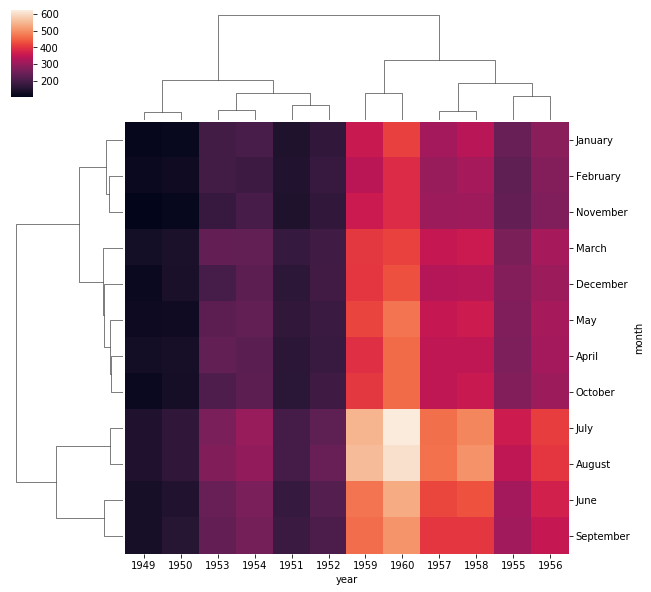

In [66]:
sns.clustermap(pvflights)

# Стили графиков

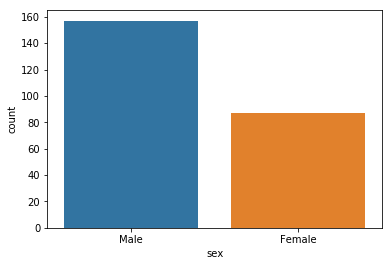

In [68]:
sns.countplot(x='sex', data=tips)

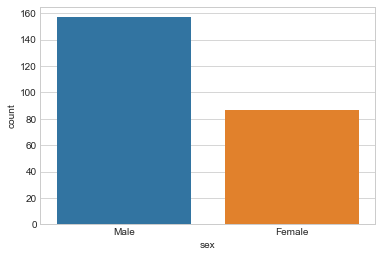

In [78]:
sns.set_style('whitegrid')  # Другие значения: darkgrid, whitegrid, dark, white, ticks
sns.countplot(x='sex', data=tips)

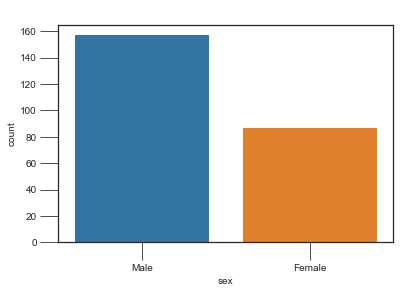

In [77]:
sns.set_style("ticks", {"xtick.major.size": 18, "ytick.major.size": 18})
sns.countplot(x='sex', data=tips)

Все переметры стиля можно посмотреть следующим образом:

In [92]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

Если необходимо применить стиль только к одному графику, для этого следует использовать менеджер контекста with

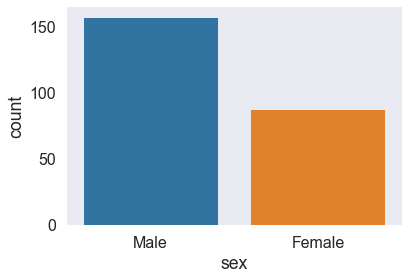

In [102]:
with sns.axes_style("dark"):
    sns.countplot(x='sex', data=tips)

Можно удалить линии осей при помощи метода despine

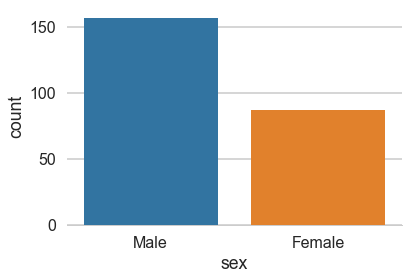

In [103]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True) 

Размеры задаются так же, как и в обычном matplotlib.

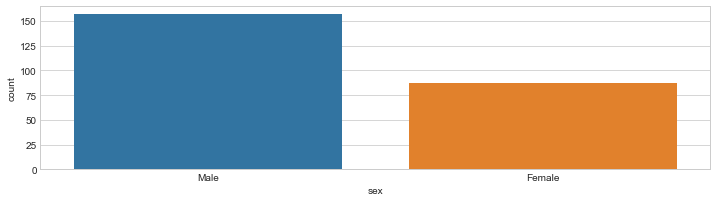

In [81]:
plt.figure(figsize=(12, 3))
sns.countplot(x='sex', data=tips)

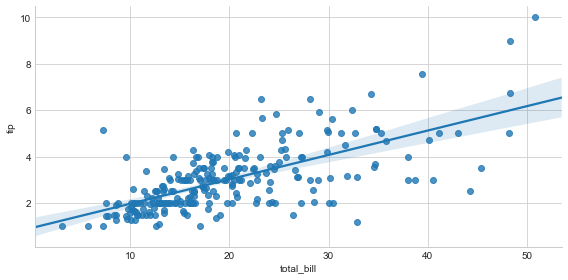

In [86]:
sns.lmplot(x='total_bill', y='tip', size=4, aspect=2, data=tips)

This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style. The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”, which are version of the notebook parameters scaled by .8, 1.3, and 1.6, respectively.

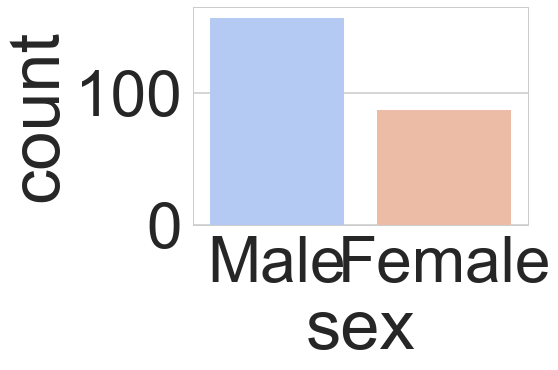

In [88]:
sns.set_context('poster', font_scale=4)
sns.countplot(x='sex', data=tips, palette='coolwarm')

# Использование Seaborn совместно с matplotlib

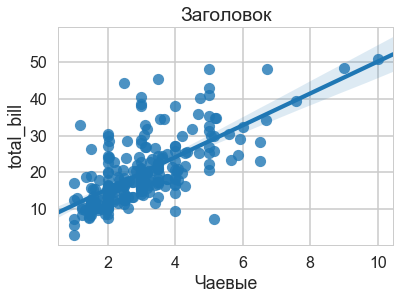

In [114]:
fig, ax = plt.subplots()
sns.regplot("tip", "total_bill", data=tips, ax=ax)
ax.set_title("Заголовок")
plt.xlabel('Чаевые')
fig.savefig("filename.png", dpi=200)